<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/predictiveanalysisonnewsdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import pandas as pd
from pandas.io.json import json_normalize
import json

In [3]:
df= pd.read_json("/content/drive/MyDrive/enhanceduserdatabeta1.json", lines=True)

In [4]:
df.head()

,_index,_type,_id,_score,_source
0,enhanceduserdatabeta1,core2,AXGicw8zutugd-ZqVCZf,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
1,enhanceduserdatabeta1,core2,AXGidE5mCFpND4aqB9Bq,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
2,enhanceduserdatabeta1,core2,AXGidFqlutugd-ZqVDUg,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
3,enhanceduserdatabeta1,core2,AXGidneQutugd-ZqVE1I,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."
4,enhanceduserdatabeta1,core2,AXGidvgrCFpND4aqB-8w,1,"{'publisher_id': '49491', 'date': '2020-04-22'..."


In [5]:
df.shape

(107600, 5)

In [6]:
source=pd.json_normalize(df._source)

In [8]:
source.head()

,publisher_id,date,country,page_title,organisation,picture_jpg,incomelevel,mastercookie_id,clickurloriginal,sourceUrl,top_url,br_user_agent,refcurrent,refcurrentoriginal,canvas_installed,clickedurl,sessionhash,screen_resoln,audience_segment,id,state,QuarterValue,page_meta_tag,brandName,reforiginal,ip,picture_gif,font_installed,cookie_id,cookiehash,browser_name,fingerprint_id,gif_animated,localStoragecuid,system_os,subcategory,dual_orientation,channel_id,parameters,device,picture_png,streaming_mov,engagementTime,gender,city,hotspot,visitor_id,agegroup,colors,request_time,referrerType,hseries,channel_name,streaming_mp4,publisher_name,ISP,session_id,time_zone,installed_activex,resolution_properties,ux_full_desktop,referrer,modelName,streaming_video,plugin,isWireless,localStorageid,screen_properties,streaming_3gpp,browserversion,latitude_longitude,postalcode,authorName,tag,publishDatev1,section
0,49491,2020-04-22,,,None,false,medium,18fdd55d_bd79_4654_a72d_10ca6652988c,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_khabare_ab_tak_story_caste...,https://m.aajtak.in/khabare-ab-tak/story/caste...,2227547380,,7.683189e+17,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/khabare-ab-tak/story/caste...,"2409:4052:887:1836:1d8f:8a33:34b5:f29d, 64.233...",false,false,a81e34f6_1d23_48ca_9254_a4f6a072822d,-1.226066e+18,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,1bd04fa3-e158-4560-9f12-52b318588b1f,Android_4.2,,true,78844,,Mobile,false,false,6.0,female,,hotspot,e9b7951d-f0fd-4c1b-88b3-4289eda2fb78,25_34,65536,2020-04-22 15:12:24,Others,ref,AJTK,true,NS,None,fb8adeda_347c_427b_bd09_28113082c8fc,420,1146773256,1080_1920,false,https___m_aajtak_in_khabare_ab_tak_story_caste...,Google_Nexus_5_2013_october,true,1257683291,true,a81e34f6-1d23-48ca-9254-a4f6a072822d,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
1,49491,2020-04-22,,,None,false,low,bf529ba0_b27a_49f9_9907_d3bd9c10ae1b,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_karyakrams_das_tak_video__...,https://m.aajtak.in/karyakrams/das-tak/video/-...,2227547380,,-3.215504e+18,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/,"2405:204:1299:b635:7e57:1081:c615:95d9, 64.233...",false,false,bca6391f_4a71_4591_9981_b2584d9c0b62,-5.499536e+16,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,29665632-ea86-41b7-a814-17d69d4ba110,Android_4.2,,true,78844,,Mobile,false,false,1.0,male,,hotspot,754cc585-b30e-4b62-9288-9fedfdc42684,45_54,65536,2020-04-22 15:13:13,Others,ref,AJTK,true,NS,None,72c7497f_1464_4669_9c47_6bf72ad0ccf8,420,1146773256,1080_1920,false,https___m_aajtak_in_,Google_Nexus_5_2013_october,true,1257683291,true,bca6391f-4a71-4591-9981-b2584d9c0b62,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
2,49491,2020-04-22,,,None,false,low,7c83502a_ac2c_4cd6_95f8_e2aa101e3315,,aajtak.intoday.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_national_video_sapna_chaud...,https://m.aajtak.in/national/video/sapna-chaud...,2227547380,,6.002996e+17,4031165888,,1,,Quarter4,,Google,https://aajtak.intoday.in/video/sapna-chaudhar...,"2401:4900:b9e:8f3d:0:61:e40e:d501, 64.233.172.53",false,false,417e7380_4970_4fd9_bd0d_240a5113d18b,3.129562e+17,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,f711131b-acc2-47de-adf2-9fa7701e0a2c,Android_4.2,,true,78844,,Mobile,false,false,6.0,male,,hotspot,fb3b8a13-48b9-4756-ab3d-a5c777ccf8ca,45_54,65536,2020-04-22 15:13:49,Others,ref,AJTK,true,NS,None,e8ebd886_1050_45d6_91f6_5462d4c6043c,420,1146773256,1080_1920,false,https___aajtak_intoday_in_video_sapna_chaudhar...,Google_Nexus_5_2013_october,true,1257683291,true,417e7380-4970-4fd9-bd0d-240a5113d18b,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
3,49491,2020-04-22,,,None,false,medium,790aa1ad_f20d_4367_b2c2_d68c3349ae84,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_movie_masala_news_on_films...,https://m.aajtak.in/movie-masala/news-on-films...,2227547380,,7.430573e+18,4031165888,

In [9]:
con= pd.concat([df, source], axis=1)

In [11]:
con.head(2)

,_index,_type,_id,_score,_source,publisher_id,date,country,page_title,organisation,picture_jpg,incomelevel,mastercookie_id,clickurloriginal,sourceUrl,top_url,br_user_agent,refcurrent,refcurrentoriginal,canvas_installed,clickedurl,sessionhash,screen_resoln,audience_segment,id,state,QuarterValue,page_meta_tag,brandName,reforiginal,ip,picture_gif,font_installed,cookie_id,cookiehash,browser_name,fingerprint_id,gif_animated,localStoragecuid,system_os,...,dual_orientation,channel_id,parameters,device,picture_png,streaming_mov,engagementTime,gender,city,hotspot,visitor_id,agegroup,colors,request_time,referrerType,hseries,channel_name,streaming_mp4,publisher_name,ISP,session_id,time_zone,installed_activex,resolution_properties,ux_full_desktop,referrer,modelName,streaming_video,plugin,isWireless,localStorageid,screen_properties,streaming_3gpp,browserversion,latitude_longitude,postalcode,authorName,tag,publishDatev1,section
0,enhanceduserdatabeta1,core2,AXGicw8zutugd-ZqVCZf,1,"{'publisher_id': '49491', 'date': '2020-04-22'...",49491,2020-04-22,,,None,false,medium,18fdd55d_bd79_4654_a72d_10ca6652988c,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_khabare_ab_tak_story_caste...,https://m.aajtak.in/khabare-ab-tak/story/caste...,2227547380,,7.683189e+17,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/khabare-ab-tak/story/caste...,"2409:4052:887:1836:1d8f:8a33:34b5:f29d, 64.233...",false,false,a81e34f6_1d23_48ca_9254_a4f6a072822d,-1.226066e+18,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,1bd04fa3-e158-4560-9f12-52b318588b1f,Android_4.2,...,true,78844,,Mobile,false,false,6.0,female,,hotspot,e9b7951d-f0fd-4c1b-88b3-4289eda2fb78,25_34,65536,2020-04-22 15:12:24,Others,ref,AJTK,true,NS,None,fb8adeda_347c_427b_bd09_28113082c8fc,420,1146773256,1080_1920,false,https___m_aajtak_in_khabare_ab_tak_story_caste...,Google_Nexus_5_2013_october,true,1257683291,true,a81e34f6-1d23-48ca-9254-a4f6a072822d,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
1,enhanceduserdatabeta1,core2,AXGidE5mCFpND4aqB9Bq,1,"{'publisher_id': '49491', 'date': '2020-04-22'...",49491,2020-04-22,,,None,false,low,bf529ba0_b27a_49f9_9907_d3bd9c10ae1b,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_karyakrams_das_tak_video__...,https://m.aajtak.in/karyakrams/das-tak/video/-...,2227547380,,-3.215504e+18,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/,"2405:204:1299:b635:7e57:1081:c615:95d9, 64.233...",false,false,bca6391f_4a71_4591_9981_b2584d9c0b62,-5.499536e+16,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,29665632-ea86-41b7-a814-17d69d4ba110,Android_4.2,...,true,78844,,Mobile,false,false,1.0,male,,hotspot,754cc585-b30e-4b62-9288-9fedfdc42684,45_54,65536,2020-04-22 15:13:13,Others,ref,AJTK,true,NS,None,72c7497f_1464_4669_9c47_6bf72ad0ccf8,420,1146773256,1080_1920,false,https___m_aajtak_in_,Google_Nexus_5_2013_october,true,1257683291,true,bca6391f-4a71-4591-9981-b2584d9c0b62,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
con= con.drop("_source", axis=1)

In [16]:
con.head(20)

,_index,_type,_id,_score,publisher_id,date,country,page_title,organisation,picture_jpg,incomelevel,mastercookie_id,clickurloriginal,sourceUrl,top_url,br_user_agent,refcurrent,refcurrentoriginal,canvas_installed,clickedurl,sessionhash,screen_resoln,audience_segment,id,state,QuarterValue,page_meta_tag,brandName,reforiginal,ip,picture_gif,font_installed,cookie_id,cookiehash,browser_name,fingerprint_id,gif_animated,localStoragecuid,system_os,subcategory,dual_orientation,channel_id,parameters,device,picture_png,streaming_mov,engagementTime,gender,city,hotspot,visitor_id,agegroup,colors,request_time,referrerType,hseries,channel_name,streaming_mp4,publisher_name,ISP,session_id,time_zone,installed_activex,resolution_properties,ux_full_desktop,referrer,modelName,streaming_video,plugin,isWireless,localStorageid,screen_properties,streaming_3gpp,browserversion,latitude_longitude,postalcode,authorName,tag,publishDatev1,section
0,enhanceduserdatabeta1,core2,AXGicw8zutugd-ZqVCZf,1,49491,2020-04-22,,,None,false,medium,18fdd55d_bd79_4654_a72d_10ca6652988c,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_khabare_ab_tak_story_caste...,https://m.aajtak.in/khabare-ab-tak/story/caste...,2227547380,,7.683189e+17,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/khabare-ab-tak/story/caste...,"2409:4052:887:1836:1d8f:8a33:34b5:f29d, 64.233...",false,false,a81e34f6_1d23_48ca_9254_a4f6a072822d,-1.226066e+18,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,1bd04fa3-e158-4560-9f12-52b318588b1f,Android_4.2,,true,78844,,Mobile,false,false,6.0,female,,hotspot,e9b7951d-f0fd-4c1b-88b3-4289eda2fb78,25_34,65536,2020-04-22 15:12:24,Others,ref,AJTK,true,NS,None,fb8adeda_347c_427b_bd09_28113082c8fc,420,1146773256,1080_1920,false,https___m_aajtak_in_khabare_ab_tak_story_caste...,Google_Nexus_5_2013_october,true,1257683291,true,a81e34f6-1d23-48ca-9254-a4f6a072822d,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
1,enhanceduserdatabeta1,core2,AXGidE5mCFpND4aqB9Bq,1,49491,2020-04-22,,,None,false,low,bf529ba0_b27a_49f9_9907_d3bd9c10ae1b,,m.aajtak.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_karyakrams_das_tak_video__...,https://m.aajtak.in/karyakrams/das-tak/video/-...,2227547380,,-3.215504e+18,4031165888,,1,,Quarter4,,Google,https://m.aajtak.in/,"2405:204:1299:b635:7e57:1081:c615:95d9, 64.233...",false,false,bca6391f_4a71_4591_9981_b2584d9c0b62,-5.499536e+16,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,29665632-ea86-41b7-a814-17d69d4ba110,Android_4.2,,true,78844,,Mobile,false,false,1.0,male,,hotspot,754cc585-b30e-4b62-9288-9fedfdc42684,45_54,65536,2020-04-22 15:13:13,Others,ref,AJTK,true,NS,None,72c7497f_1464_4669_9c47_6bf72ad0ccf8,420,1146773256,1080_1920,false,https___m_aajtak_in_,Google_Nexus_5_2013_october,true,1257683291,true,bca6391f-4a71-4591-9981-b2584d9c0b62,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
2,enhanceduserdatabeta1,core2,AXGidFqlutugd-ZqVDUg,1,49491,2020-04-22,,,None,false,low,7c83502a_ac2c_4cd6_95f8_e2aa101e3315,,aajtak.intoday.in,,Mozilla/5.0 (Linux; Android 4.2.1; en-us; Nexu...,https___m_aajtak_in_national_video_sapna_chaud...,https://m.aajtak.in/national/video/sapna-chaud...,2227547380,,6.002996e+17,4031165888,,1,,Quarter4,,Google,https://aajtak.intoday.in/video/sapna-chaudhar...,"2401:4900:b9e:8f3d:0:61:e40e:d501, 64.233.172.53",false,false,417e7380_4970_4fd9_bd0d_240a5113d18b,3.129562e+17,Chrome_Mobile,4031165888_2227547380_1146773256_420,false,f711131b-acc2-47de-adf2-9fa7701e0a2c,Android_4.2,,true,78844,,Mobile,false,false,6.0,male,,hotspot,fb3b8a13-48b9-4756-ab3d-a5c777ccf8ca,45_54,65536,2020-04-22 15:13:49,Others,ref,AJTK,true,NS,None,e8ebd886_1050_45d6_91f6_5462d4c6043c,420,1146773256,1080_1920,false,https___aajtak_intoday_in_video_sapna_chaudhar...,Google_Nexus_5_2013_october,true,1257683291,true,417e7380-4970-4fd9-bd0d-240a5113d18b,62_110,true,18,NaN,NaN,NaN,NaN,NaN,NaN
3,enhanceduserdatabeta1,core2,AXGidneQutugd-ZqVE1I,1,49491,2020-04-22,,,None,false,medium,790aa1ad_

getting our desired columns for analysis of churn prediction and also filling the missing audience segments using latent dirchlet allocation technique

In [17]:
li= ["refcurrentoriginal", "audience_segment", "engagementTime", "gender"]

In [64]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [65]:
new= select_columns(con,li)

In [66]:
new.head()

,refcurrentoriginal,audience_segment,engagementTime,gender
0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,6.0,female
1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,1.0,male
2,https://m.aajtak.in/national/video/sapna-chaud...,,6.0,male
3,https://m.aajtak.in/movie-masala/news-on-films...,,4.0,male
4,https://m.aajtak.in/karyakrams/kismat-konnecti...,,1.0,female


In [67]:
new["refcurrentoriginal"]= new["refcurrentoriginal"].astype("str")


using tokenization and removing unwanted segments from the refcurrent original column to create a cleaned corpus and then merging the same in the dataframe

In [68]:
new['result'] = new['refcurrentoriginal'].map(lambda x: x.lstrip('https://m. www').rstrip('aAbBcC'))

In [69]:
new.head()

,refcurrentoriginal,audience_segment,engagementTime,gender,result
0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,6.0,female,aajtak.in/khabare-ab-tak/story/caste-based-cen...
1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,1.0,male,aajtak.in/karyakrams/das-tak/video/-when-will-...
2,https://m.aajtak.in/national/video/sapna-chaud...,,6.0,male,aajtak.in/national/video/sapna-chaudhary-dance...
3,https://m.aajtak.in/movie-masala/news-on-films...,,4.0,male,aajtak.in/movie-masala/news-on-films/story/sha...
4,https://m.aajtak.in/karyakrams/kismat-konnecti...,,1.0,female,aajtak.in/karyakrams/kismat-konnection/video/k...


In [71]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("popular")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading 

True

In [72]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
corpus=[]
for i in range(0,len(new)):
  print(i)
  review= re.sub("[^a-zA-Z]", " ", new["result"][i])
  review= review.lower()
  review= review.split()
  review= [ps.stem(word) for word in review if not word in stopwords.words("english")]
  review= " ".join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
102600
102601
102602
102603
102604
102605
102606
102607
102608
102609
102610
102611
102612
102613
102614
102615
102616
102617
102618
102619
102620
102621
102622
102623
102624
102625
102626
102627
102628
102629
102630
102631
102632
102633
102634
102635
102636
102637
102638
102639
102640
102641
102642
102643
102644
102645
102646
102647
102648
102649
102650
102651
102652
102653
102654
102655
102656
102657
102658
102659
102660
102661
102662
102663
102664
102665
102666
102667
102668
102669
102670
102671
102672
102673
102674
102675
102676
102677
102678
102679
102680
102681
102682
102683
102684
102685
102686
102687
102688
102689
102690
102691
102692
102693
102694
102695
102696
102697
102698
102699
102700
102701
102702
102703
102704
102705
102706
102707
102708
102709
102710
102711
102712
102713
102714
102715
102716
102717
102718
102719
102720
102721
102722
102723
102724
102725
102726
102727
102728
102729
102730
102731
102732
102733
102734
1027

In [73]:
corpus

['aajtak khabar ab tak stori cast base censu happen year',
 'aajtak karyakram da tak video crime women stop',
 'aajtak nation video sapna chaudhari danc show bihar begusarai rucku crowd',
 'aajtak movi masala news film stori shahid kapoor father pankaj kapoor hindi remak jersey tmov',
 'aajtak karyakram kismat konnect video kismat connect episod novemb',
 'aajtak movi masala news film stori pulkit samrat kriti kharbanda talk relatonship tmov',
 'aajtak movi masala news film stori shah rukh khan impress son abram made sketch bollywood superstar tmov',
 'aajtak aajtak special ayodhya case verdict stori ayodhya verdict suprem court pm modi appeal maintain peac harmoni dat',
 'aajtak movi masala viral video stori pawan singh new bhojpuri song dugo rakhal bani song viral bhojpuri gana lb',
 'aajtak movi masala news film stori vidyut jamwal move like anim recent releas video tmov',
 'aajtak karyakram halla bol video halla bol sadhvi pragya thakur defenc committe parliament modi govern rajnat

using count vectorizer for predictive analysis

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
new["news"]= corpus

In [76]:
new.head()

,refcurrentoriginal,audience_segment,engagementTime,gender,result,news
0,https://m.aajtak.in/khabare-ab-tak/story/caste...,,6.0,female,aajtak.in/khabare-ab-tak/story/caste-based-cen...,aajtak khabar ab tak stori cast base censu hap...
1,https://m.aajtak.in/karyakrams/das-tak/video/-...,,1.0,male,aajtak.in/karyakrams/das-tak/video/-when-will-...,aajtak karyakram da tak video crime women stop
2,https://m.aajtak.in/national/video/sapna-chaud...,,6.0,male,aajtak.in/national/video/sapna-chaudhary-dance...,aajtak nation video sapna chaudhari danc show ...
3,https://m.aajtak.in/movie-masala/news-on-films...,,4.0,male,aajtak.in/movie-masala/news-on-films/story/sha...,aajtak movi masala news film stori shahid kapo...
4,https://m.aajtak.in/karyakrams/kismat-konnecti...,,1.0,female,aajtak.in/karyakrams/kismat-konnection/video/k...,aajtak karyakram kismat konnect video kismat c...


In [77]:
new= new.drop(["result","refcurrentoriginal"], axis=1)

In [78]:
new.head()

,audience_segment,engagementTime,gender,news
0,,6.0,female,aajtak khabar ab tak stori cast base censu hap...
1,,1.0,male,aajtak karyakram da tak video crime women stop
2,,6.0,male,aajtak nation video sapna chaudhari danc show ...
3,,4.0,male,aajtak movi masala news film stori shahid kapo...
4,,1.0,female,aajtak karyakram kismat konnect video kismat c...


In [79]:
new.news.value_counts()

aajtak                                                                                                   13344
nan                                                                                                       8129
aajtak intoday                                                                                            3933
aajtak world galleri north korean media silent kim jong un health rumour tlif                             3031
aajtak crime vaardaat stori corona kovid india back gear danger deadli viru crime                         2957
                                                                                                         ...  
aajtak movi masala small screen stori priyanka chopra reveal love life next koffe karan episod               1
indiatoday video movi emb odqyodyw                                                                           1
indiatoday india stori republ day gallantri medal ip offic constabl                                          1
a

removing the rows from news column that contain nan values

In [80]:
new= new[new.news != "nan"]

In [81]:
new.news.value_counts()

aajtak                                                                                                   13344
aajtak intoday                                                                                            3933
aajtak world galleri north korean media silent kim jong un health rumour tlif                             3031
aajtak crime vaardaat stori corona kovid india back gear danger deadli viru crime                         2957
indiatoday                                                                                                2255
                                                                                                         ...  
aajtak movi masala small screen stori priyanka chopra reveal love life next koffe karan episod               1
indiatoday video movi emb odqyodyw                                                                           1
indiatoday india stori republ day gallantri medal ip offic constabl                                          1
a

In [82]:
vectorizer = CountVectorizer()
vectornews = vectorizer.fit_transform(new["news"])

In [99]:
vectornews.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [100]:
data= pd.DataFrame(vectornews)

In [83]:
new.head()

,audience_segment,engagementTime,gender,news
0,,6.0,female,aajtak khabar ab tak stori cast base censu hap...
1,,1.0,male,aajtak karyakram da tak video crime women stop
2,,6.0,male,aajtak nation video sapna chaudhari danc show ...
3,,4.0,male,aajtak movi masala news film stori shahid kapo...
4,,1.0,female,aajtak karyakram kismat konnect video kismat c...


In [84]:
new["gender"]= pd.get_dummies(new.gender, drop_first=True)

In [85]:
new.head()

,audience_segment,engagementTime,gender,news
0,,6.0,1,aajtak khabar ab tak stori cast base censu hap...
1,,1.0,0,aajtak karyakram da tak video crime women stop
2,,6.0,0,aajtak nation video sapna chaudhari danc show ...
3,,4.0,0,aajtak movi masala news film stori shahid kapo...
4,,1.0,1,aajtak karyakram kismat konnect video kismat c...


In [86]:
from sklearn.decomposition import LatentDirichletAllocation

In [87]:
LDA = LatentDirichletAllocation(n_components=23, random_state=42)

In [89]:
LDA.fit(vectornews)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=23, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [90]:
topic_values = LDA.transform(vectornews)
topic_values.shape

(99471, 23)

In [91]:
new['segments'] = topic_values.argmax(axis=1)

In [92]:
new.head(3)

,audience_segment,engagementTime,gender,news,segments
0,,6.0,1,aajtak khabar ab tak stori cast base censu hap...,5
1,,1.0,0,aajtak karyakram da tak video crime women stop,11
2,,6.0,0,aajtak nation video sapna chaudhari danc show ...,14


In [93]:
new_update= new.drop("audience_segment", axis=1)

In [94]:
new_update.head(2)

,engagementTime,gender,news,segments
0,6.0,1,aajtak khabar ab tak stori cast base censu hap...,5
1,1.0,0,aajtak karyakram da tak video crime women stop,11


In [98]:
new_update.dtypes

engagementTime    float64
gender              uint8
news               object
segments            int64
vectorizednews     object
dtype: object

In [96]:
new_update["vectorizednews"]= vectornews

In [97]:
new_update.head(2)

,engagementTime,gender,news,segments,vectorizednews
0,6.0,1,aajtak khabar ab tak stori cast base censu hap...,5,"(0, 7)\t1\n (0, 5250)\t1\n (0, 47)\t1\n (..."
1,1.0,0,aajtak karyakram da tak video crime women stop,11,"(0, 7)\t1\n (0, 5250)\t1\n (0, 47)\t1\n (..."


In [102]:
new_update= new_update.drop("news", axis=1)

In [106]:
new_update.head(2)

,engagementTime,gender,segments,vectorizednews
0,6.0,1,5,"(0, 7)\t1\n (0, 5250)\t1\n (0, 47)\t1\n (..."
1,1.0,0,11,"(0, 7)\t1\n (0, 5250)\t1\n (0, 47)\t1\n (..."


In [110]:
new_update= new_update.drop("vectorizednews", axis=1)

In [111]:
from sklearn.cluster import KMeans

In [112]:
k_rng= range(1,15)
sse=[]#------------------------> creating an empty list of sse and will append the same with values after the execution of for loop
for k in k_rng:
  km= KMeans(n_clusters=k)
  km.fit(new_update[["engagementTime", "gender","segments"]])
  sse.append(km.inertia_)#----------> this inertia method helps in performing the sum of square errors and helps in getting a better understanding of k

In [117]:
import matplotlib.pyplot as plt

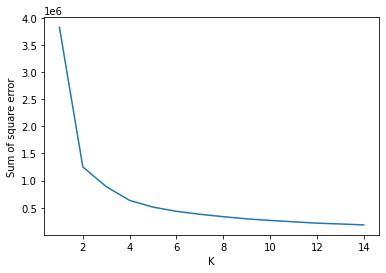

In [115]:
plt.xlabel("K")
plt.ylabel("Sum of square error")
plt.plot(k_rng,sse)

In [120]:
new_update.head()

,engagementTime,gender,segments
0,6.0,1,5
1,1.0,0,11
2,6.0,0,14
3,4.0,0,14
4,1.0,1,13


as per the elbow diagram we can see that k = 2 will be the correct cluster to be formed and also we are concerned with that only

plotting a correlation matrix to see the correlation between the independent features

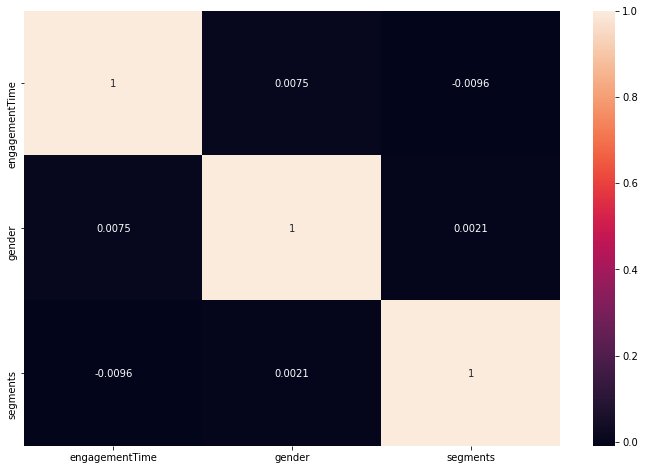

In [124]:
plt.figure(figsize=(12,8))
sns.heatmap(new_update.corr(), annot=True)
plt.show()

above we can see that the independent features are very less correlated with each other which is a good thing for our analysis

In [125]:
km= KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

forming target clusters based on engagement time. values above 3 are considered to be retained customers and below it indicates churned customers

In [131]:
y_predict= km.fit_predict(new_update[["engagementTime"]])
y_predict

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [132]:
new_update["target"]= y_predict

In [133]:
new_update.head(25)

,engagementTime,gender,segments,target
0,6.0,1,5,0
1,1.0,0,11,1
2,6.0,0,14,0
3,4.0,0,14,0
4,1.0,1,13,1
5,3.0,1,14,1
6,7.0,1,14,0
7,4.0,0,4,0
8,7.0,0,14,0
9,5.0,1,14,0


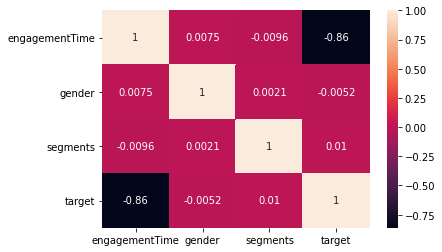

In [135]:
sns.heatmap(new_update.corr(), annot=True)

dropping the gender column as it is not an important feature to decide the churnability of the customer. It just shows the distribution of customers who churned or retained

In [136]:
new_upd= new_update.drop("gender", axis=1)

In [137]:
new_upd.head(4)

,engagementTime,segments,target
0,6.0,5,0
1,1.0,11,1
2,6.0,14,0
3,4.0,14,0


dividing the data into test and train for fitting it into the machine learning model.

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X= new_upd.drop("target", axis=1)

In [140]:
y= new_upd.target

In [141]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [142]:
X_train.shape, X_test.shape

((69629, 2), (29842, 2))

multinomial naive bayes

In [143]:
from sklearn.naive_bayes import MultinomialNB

In [159]:
model= MultinomialNB(alpha=1)

In [160]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [162]:
y_predict= model.predict(X_test)

In [163]:
model.score(X_test,y_test)

0.8333221633938744

In [183]:
from sklearn.metrics import classification_report, confusion_matrix

In [182]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     17009
           1       0.87      0.73      0.79     12833

    accuracy                           0.83     29842
   macro avg       0.84      0.82      0.83     29842
weighted avg       0.84      0.83      0.83     29842



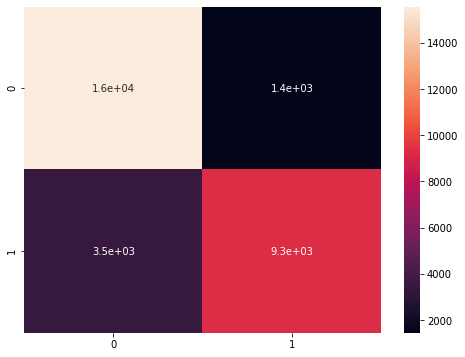

In [187]:
plt.figure(figsize=(8,6))

sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)

here 0 indicates retained and 1 indicates churned.we can see that the model has rightly  predicted 0   1.6e+04 times and 1   9.3e+03 times